In [4]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [5]:
import sklearn
print(sklearn.__version__)

import sys
print(sys.version)
print(sys.path)

1.1.1
3.9.12 (main, Jun  1 2022, 11:38:51) 
[GCC 7.5.0]
['/media/soham/Study/ML Projects/Bengaluru House Price Prediction', '/home/soham/anaconda3/envs/my_env/lib/python39.zip', '/home/soham/anaconda3/envs/my_env/lib/python3.9', '/home/soham/anaconda3/envs/my_env/lib/python3.9/lib-dynload', '', '/home/soham/anaconda3/envs/my_env/lib/python3.9/site-packages']


In [6]:
df1 = pd.read_csv("bengaluru_house_prices.csv")

In [7]:
print("Shape of the table :",df1.shape)

Shape of the table : (13320, 9)


In [8]:
df1.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## Data Cleaning

### Drop unnecessary columns

In [9]:
df1.area_type.value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [10]:
# Drop unnecessary columns

df2 = df1.drop(['area_type', 'availability', 'society'],axis='columns')

In [11]:
df2.shape

(13320, 6)

### Handle NA values

In [12]:
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [13]:
df2.balcony.value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

In [14]:
df2.balcony.unique()

array([ 1.,  3., nan,  2.,  0.])

In [15]:
# Fill NA of balcony with mean value

import math
mean = math.floor(df2.balcony.mean())
df2.balcony = df2.balcony.fillna(mean)

In [16]:
# Fill NA of bathroom with mean value

mean = math.floor(df2.bath.mean())
df2.bath = df2.bath.fillna(mean)

In [17]:
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [18]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath           0
balcony        0
price          0
dtype: int64

In [19]:
# Now Drop rows with NA values as we can't do much about them

df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [20]:
df3.shape

(13303, 6)

### Feature Engineering (Create new feature bedroom from size column)

In [21]:
df3.head(5)

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [22]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.bhk.unique()

/tmp/ipykernel_3201/2716584372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [23]:
df3 = df3.drop(['size'],axis='columns')
df3.head(3)

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3


In [24]:
df3.shape

(13303, 6)

### Feature Engineering (One sqft column)

In [25]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [26]:
# Try to float the given number, 
# If it was not possible then it will goes to exception and return False from there.
# Else return True

def is_float(x):
    try: 
        float(x)
    except:
        return False
    return True

In [27]:
# Make deep copy

df4 = df3.copy()

In [28]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,total_sqft,bath,balcony,price,bhk
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
56,Devanahalli,3010 - 3410,2.0,1.0,192.000,4
81,Hennur Road,2957 - 3450,2.0,1.0,224.500,4
122,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,1015 - 1540,2.0,0.0,56.800,2
224,Devanahalli,1520 - 1740,2.0,1.0,74.820,3
410,Kengeri,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,0.0,63.770,2


In [29]:
df4.shape

(13303, 6)

In [30]:
# If its in range format like 1195 - 1440 then take avg
# else return None, which we eventually drop

def convert(x):
    token = x.split('-')
    if len(token) == 2:
        return (float(token[0]) + float(token[1])) // 2
    
    try:
        return float(x)
    except:
        return None

In [31]:
df4.total_sqft = df4.total_sqft.apply(convert)
df4 = df4[df4.total_sqft.notnull()]
df4.head(3)

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3


In [32]:
df4.shape

(13257, 6)

In [33]:
df4.loc[30]

location      Yelahanka
total_sqft       2475.0
bath                4.0
balcony             0.0
price             186.0
bhk                   4
Name: 30, dtype: object

### Feature Engineering (Make Price per sqft column)

In [34]:
df5 = df4.copy()

In [35]:
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
# multiply by 100000 because our price column data is in lakhs
df5.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


### Feature Engineering (Dimensionality Reduction on location column)

In [36]:
df5.location = df5.location.apply(lambda x:x.strip())
all_locations = df5.location.value_counts()
all_locations

Whitefield                   538
Sarjapur  Road               397
Electronic City              304
Kanakpura Road               271
Thanisandra                  236
                            ... 
Nagarbhavi  BDA Complex        1
Rajanna Layout                 1
1 Ramamurthy Nagar             1
Lakshmipura Vidyaanyapura      1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [37]:
len(all_locations[all_locations<10])

1033

In [38]:
location_less_than_10 = all_locations[all_locations<10]

df5.location = df5.location.apply(lambda x: 'other' if x in location_less_than_10 else x)

In [39]:
len(df5.location.unique())

255

In [40]:
df5.head(10)

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,1.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,1.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,1.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,1.0,63.25,3,4828.244275
9,other,1020.0,6.0,1.0,370.00,6,36274.509804


### Outliers removal using business logic

In [41]:
len(df5[(df5.total_sqft/df5.bhk) < 300])

# So there 744 such data entries so we will remove them

744

In [42]:
df6 = df5[~((df5.total_sqft/df5.bhk) < 300)]

print("df5 shape:",df5.shape)
print("df6 shape:",df6.shape)

df5 shape: (13257, 7)
df6 shape: (12513, 7)


In [43]:
df6.bath.unique()

array([ 2.,  5.,  3.,  4.,  1.,  8.,  6.,  7.,  9., 14., 12., 16., 10.,
       13.])

Text(0, 0.5, 'count')

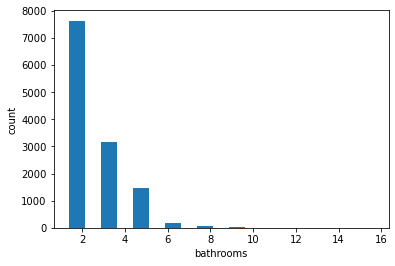

In [44]:
plt.hist(df6.bath, rwidth=0.5)
plt.xlabel("bathrooms")
plt.ylabel("count")

In [45]:
df6[df6.bath>10]

# Here we can see that 9bhk house is having 14 bathrooms 
# so we can consider them as outliers.
# Logic will be, if bathrooms > bhk+2 then remove them.

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
1078,BTM 1st Stage,3300.0,14.0,1.0,500.0,9,15151.515152
3096,other,12000.0,12.0,1.0,525.0,10,4375.000000
3609,other,10000.0,16.0,1.0,550.0,16,5500.000000
7979,other,6000.0,12.0,1.0,150.0,11,2500.000000
8636,Neeladri Nagar,4000.0,12.0,1.0,160.0,10,4000.000000
9935,other,5425.0,13.0,0.0,275.0,13,5069.124424
13067,other,7150.0,13.0,1.0,3600.0,10,50349.650350


In [46]:
df6[df6.bath>df6.bhk+2]

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
1078,BTM 1st Stage,3300.0,14.0,1.0,500.0,9,15151.515152
2620,other,11338.0,9.0,1.0,1000.0,6,8819.897689
6838,Rajaji Nagar,7500.0,8.0,3.0,1700.0,5,22666.666667
7709,Chikkabanavar,2460.0,7.0,2.0,80.0,4,3252.032520
9974,Sector 1 HSR Layout,2400.0,6.0,2.0,775.0,3,32291.666667
11366,Nagasandra,7000.0,8.0,1.0,450.0,4,6428.571429
12103,Thanisandra,1806.0,6.0,2.0,116.0,3,6423.034330
12443,other,4350.0,8.0,1.0,2600.0,4,59770.114943
13067,other,7150.0,13.0,1.0,3600.0,10,50349.650350


In [47]:
df7 = df6[df6.bath < df6.bhk+2]
df7.shape

(12360, 7)

### Outlier Removal Using Standard Deviation and Mean

In [48]:
# Describe any column

df7.price_per_sqft.describe()

count     12360.000000
mean       6246.129153
std        4055.129495
min         267.829813
25%        4201.432918
50%        5273.900297
75%        6861.208172
max      176470.588235
Name: price_per_sqft, dtype: float64

In [49]:
def remove_outliers_ppsf(df):
    temp_df = pd.DataFrame()
    for key, sub_df in df.groupby('location'):
        mean = np.mean(sub_df.price_per_sqft)
        std = np.std(sub_df.price_per_sqft)
        reduced_df = sub_df[(sub_df.price_per_sqft>(mean-std)) & (sub_df.price_per_sqft<=(mean+std))]
        temp_df = pd.concat([temp_df,reduced_df],ignore_index=True)
    return temp_df

In [50]:
df8 = remove_outliers_ppsf(df7)
df8.shape

(10144, 7)

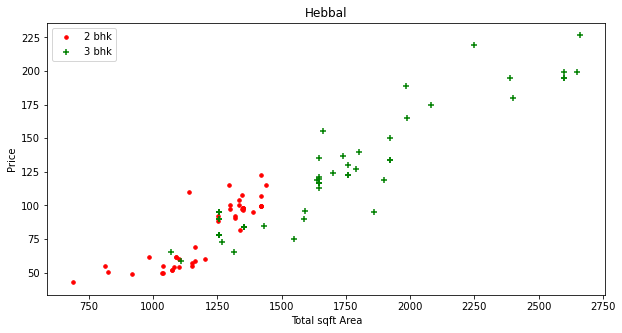

In [51]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (10,5)
    
    plt.scatter(bhk2.total_sqft,bhk2.price,marker='.',color='red',label='2 bhk', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 bhk', s=30)
    
    plt.xlabel("Total sqft Area")
    plt.ylabel("Price")
    
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df8,"Hebbal")

In [52]:
def remove_bhk_outliers(df):
    exclude = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            
            # We keep limit of 5 here because there might be some exception 
            # so we need to keep that in mind as well
            if stats and stats['count']>5:
                exclude = np.append(exclude, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    
    return df.drop(exclude,axis='index')

In [53]:
df9 = remove_bhk_outliers(df8)
df9.shape

(7315, 7)

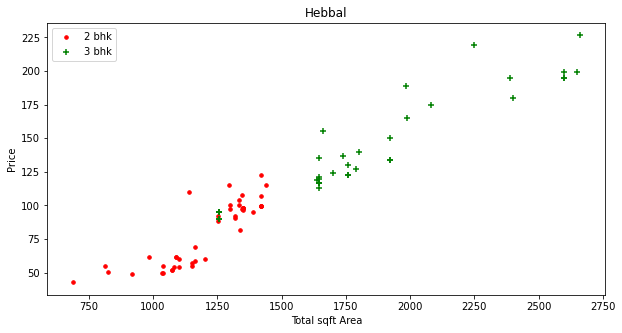

In [54]:
plot_scatter_chart(df9,"Hebbal")

In [55]:
# since purpose of price_per_sqft is done, we can remove it

df10 = df9.drop(['price_per_sqft'],axis='columns')
df10.head()

,location,total_sqft,bath,balcony,price,bhk
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2


In [56]:
df10.shape

(7315, 6)

### One Hot Encoding For Location to convert string to number

In [57]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
df11 = pd.concat([df10, dummies],axis='columns')

In [59]:
df12 = df11.drop(['other','location'],axis='columns')
df12.head()

,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df12.shape

(7315, 259)

## Model building

In [61]:
X = df12.drop(['price'],axis='columns')
X.head()

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
y = df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [63]:
print("X size:",X.shape)
print("y size:",y.shape)

X size: (7315, 258)
y size: (7315,)


In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [69]:
# Simple Linear reg model

from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
lr_model.score(X_test,y_test)

0.8876422764671048

In [70]:
# Linear regression with K-Fold cross validation 

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.85954371, 0.86373199, 0.80411695, 0.80048434, 0.84907116])

### Find best model using GridSearchCV

In [254]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [255]:
model_params = {
    'linear_regression' : {
        'model': LinearRegression(),
        'params': {
            'normalize': [True, False]
        }
    },
    'random_forest': {
        'model': RandomForestRegressor(),
        'params' : {
            'n_estimators': [20,50,80,100,120]
        }
    },
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion' : ['mse','friedman_mse'],
            'splitter': ['best','random']
        }
    },
    'lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [1,2],
            'selection': ['random', 'cyclic']
        }
    },
}

In [256]:
scores = []
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for algo_name, config in model_params.items():
    gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
    gs.fit(X,y)
    scores.append({
        'model': algo_name,
        'best_score': gs.best_score_,
        'best_params': gs.best_params_
    })

In [257]:
df13 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df13

,model,best_score,best_params
0,linear_regression,0.835390,{'normalize': False}
1,random_forest,0.763270,{'n_estimators': 100}
2,decision_tree,0.729206,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
3,lasso,0.690943,"{'alpha': 1, 'selection': 'random'}"


## Test model

In [71]:
def predict_price(location,sqft,bal,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bal
    x[3] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_model.predict([x])[0]

In [73]:
predict_price('1st Phase JP Nagar',1000,1, 2, 2)

/home/soham/anaconda3/envs/my_env/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


88.87803372195066

In [74]:
predict_price('1st Phase JP Nagar',1000,1, 3, 3)

/home/soham/anaconda3/envs/my_env/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


92.26024164261506

In [75]:
predict_price('Indira Nagar',1000,1, 2, 2)

/home/soham/anaconda3/envs/my_env/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


186.77578923467317

In [76]:
predict_price('Indira Nagar',1000,1, 3, 3)

/home/soham/anaconda3/envs/my_env/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


190.1579971553376

### Export model to a pickle file

In [77]:
import pickle
with open('model.pickle','wb') as f:
    pickle.dump(lr_model,f)

### Export location and column information

In [78]:
import json
locations = X.columns[4:]
columns = {
    'locations' : [col.lower() for col in locations]
}
with open("locations.json","w") as f:
    f.write(json.dumps(columns))